# Bank Marketing Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/Users/ayara/Downloads/bank-additional/bank-additional.csv",sep=';')

Explanation of the columns in the dataset

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [2]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Banking Visualizations

This shows the column known as y which is tells whether or not a customer has a term subscription with the bank and the histogram below is a visualization for the amount of customers that do and do not have a term subscription with the bank.

In [3]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

<AxesSubplot:>

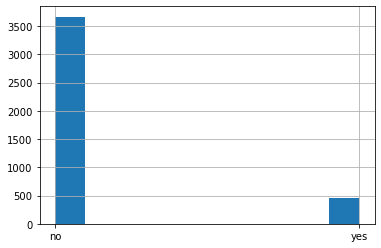

In [4]:
df['y'].hist()

These charts shows how many people that bank here are subscribed to a term deposit in two different chart forms.

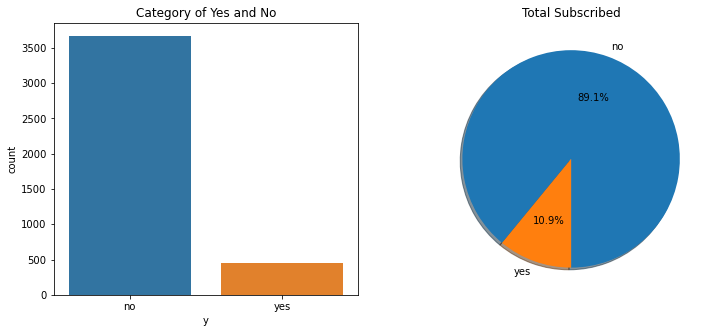

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=df)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =df['y'].value_counts(sort = True).index
sizes = df['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total Subscribed',size = 12)
plt.show()

This chart highlight the number of terms subscriptions based of occupation.

<AxesSubplot:title={'center':'Jobs vs Subscription Status'}>

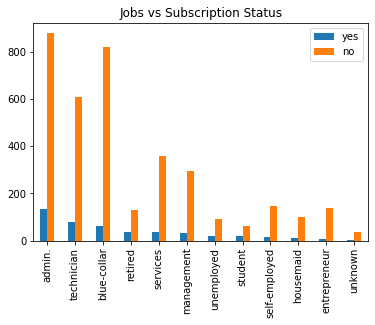

In [6]:
df2=pd.DataFrame()

df2['yes']=df[df['y'] == 'yes']['job'].value_counts()
df2['no']=df[df['y'] == 'no']['job'].value_counts()

df2.plot.bar(title= 'Jobs vs Subscription Status')

These chart highlight the different relationship status and then number of term subscriptions based of martial status.

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64


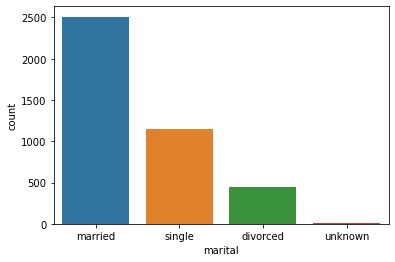

In [7]:
marital_status = df.marital.value_counts()
sns.countplot(x='marital', data=df)
print(marital_status)

<AxesSubplot:title={'center':'Marital Status vs Subscription Status'}>

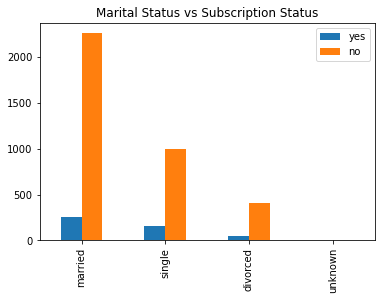

In [8]:
df2=pd.DataFrame()

df2['yes']=df[df['y'] == 'yes']['marital'].value_counts()
df2['no']=df[df['y'] == 'no']['marital'].value_counts()

df2.plot.bar(title= 'Marital Status vs Subscription Status')

This chart highlight the number of term subscriptions based of education level.

<AxesSubplot:title={'center':'Education Status vs Subscription Status'}>

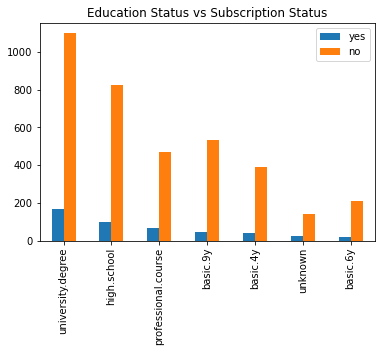

In [9]:
df2=pd.DataFrame()

df2['yes']=df[df['y'] == 'yes']['education'].value_counts()
df2['no']=df[df['y'] == 'no']['education'].value_counts()

df2.plot.bar(title= 'Education Status vs Subscription Status')

This chart highlight the number of term subscriptions based of phone contact type.

<AxesSubplot:title={'center':'Contact vs Subscription Status'}>

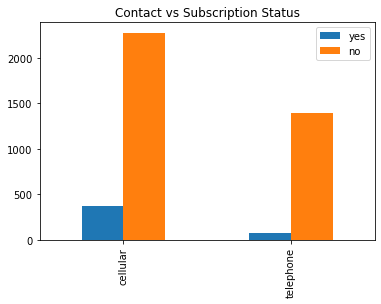

In [10]:
df2=pd.DataFrame()

df2['yes']=df[df['y'] == 'yes']['contact'].value_counts()
df2['no']=df[df['y'] == 'no']['contact'].value_counts()

df2.plot.bar(title= 'Contact vs Subscription Status')

# Split into training and testing

In [11]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(df):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
    
print(train_set.shape, test_set.shape)

(3089, 21) (1030, 21)


In [12]:
trainX = train_set.drop('y',axis=1)
trainY = train_set['y']
testX = test_set.drop('y',axis=1)
testY = test_set['y']

trainX.shape, testX.shape, trainY.shape, testY.shape

((3089, 20), (1030, 20), (3089,), (1030,))

In [13]:
trainX.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000
mean,40.089997,252.028812,2.520881,957.836517,0.198770,0.069990,93.576493,-40.460893,3.609741,5165.864972
std,10.331158,250.060423,2.512592,198.015717,0.557554,1.575059,0.582663,4.620413,1.738734,74.323398
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,311.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,29.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
testX.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,40.184466,271.061165,2.586408,968.176699,0.165049,0.129903,93.589334,-40.613689,3.656189,5168.331262
std,10.264479,267.766196,2.728714,172.220720,0.490871,1.526602,0.569466,4.516489,1.718443,71.669737
min,20.000000,4.000000,1.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,108.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,185.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5191.000000
75%,48.000000,337.750000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,82.000000,2653.000000,35.000000,999.000000,4.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000


------job------


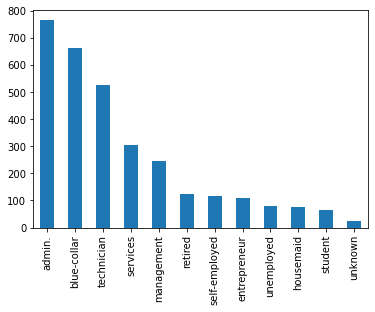

------marital------


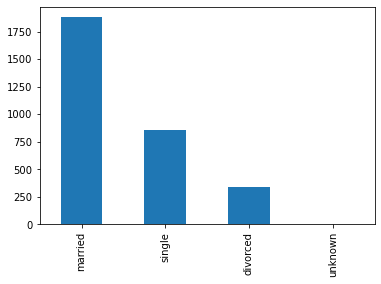

------education------


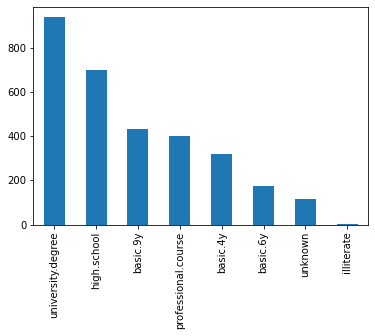

------default------


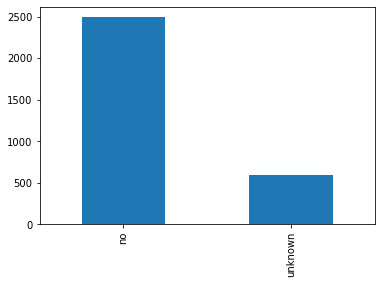

------housing------


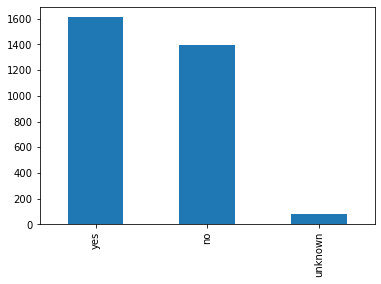

------loan------


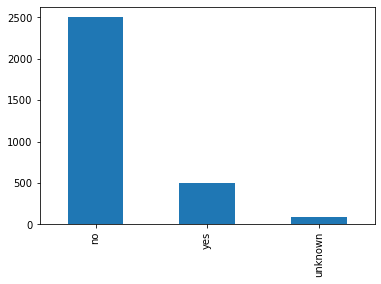

------contact------


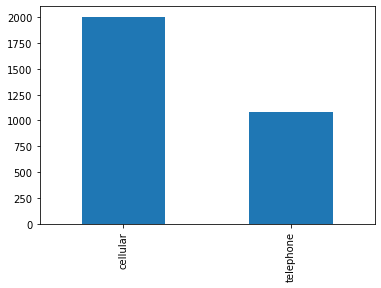

------month------


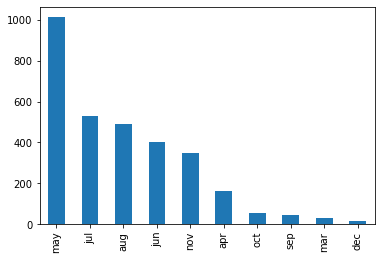

------day_of_week------


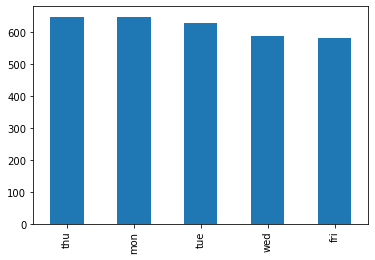

------poutcome------


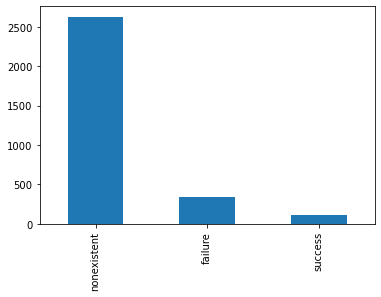

------y------


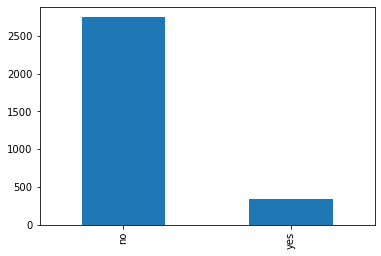

In [15]:
from matplotlib import pyplot as plt  #import matplotlib.pyplot and alias it as plt

for column in train_set.select_dtypes(object).columns: 
    print('------' + str(column) + '------')
    train_set[column].value_counts().plot.bar()
    plt.show()

------job------


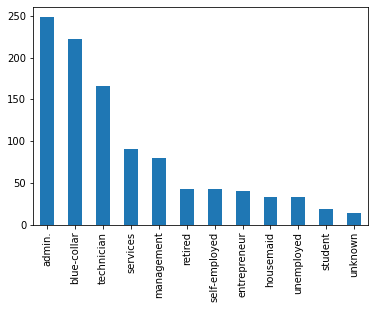

------marital------


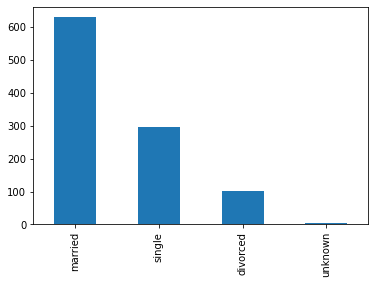

------education------


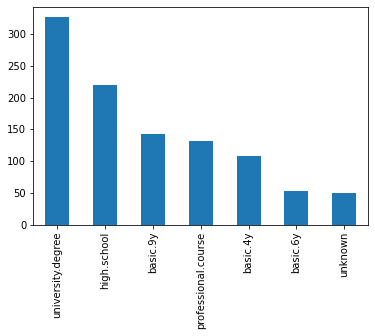

------default------


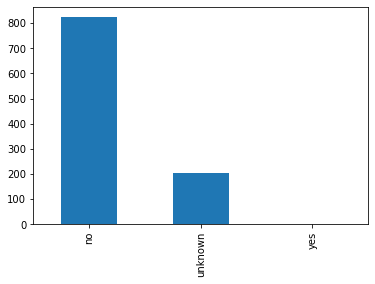

------housing------


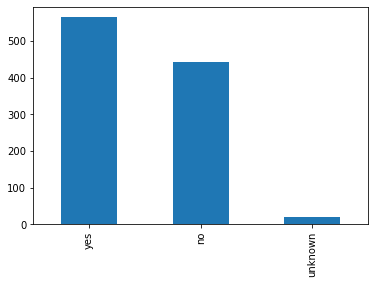

------loan------


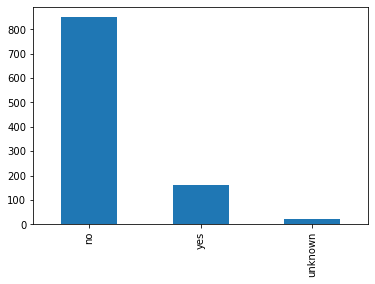

------contact------


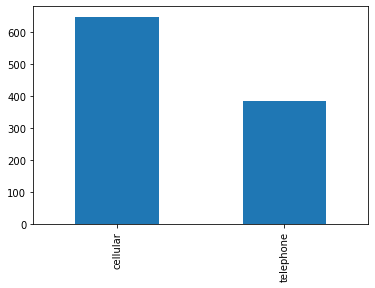

------month------


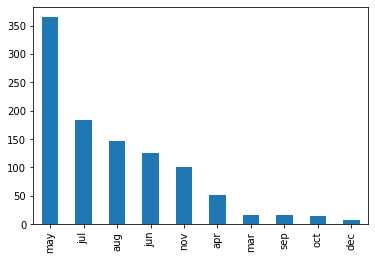

------day_of_week------


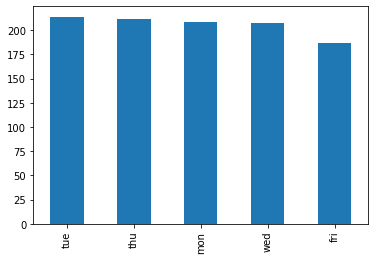

------poutcome------


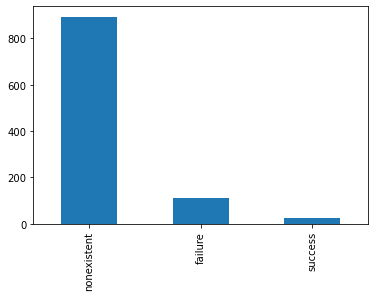

------y------


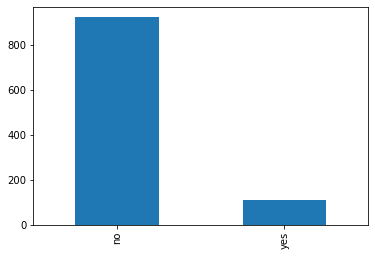

In [16]:
for column in test_set.select_dtypes(object).columns: 
    print('------' + str(column) + '------')
    test_set[column].value_counts().plot.bar()
    plt.show()

# Conclusion

Married individuals, higher educationed individuals and individuals with manager-level/high-level profession have a high rate of term subscriptions among other individuals.